
## https://github.com/wcjang/hhi
## Day 3 - 실습자료

## 필요한 데이터는 아래와 같습니다.
0. 2024_chapter9.ipynb  (한글 주석이 달려있는 파이썬 코드)
1. LungDisease.csv
2. house_sales.csv




# 1. 단순선형회귀

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

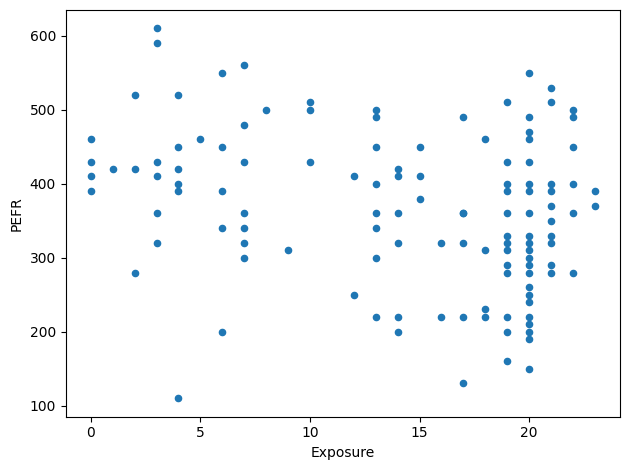

In [2]:
# 데이터 경로 설정
DATA = '/content/drive/MyDrive/Colab Notebooks/data'

LUNG_CSV = DATA + '/LungDisease.csv'
HOUSE_CSV = DATA + '/house_sales.csv'

# 데이터 불러오기
lung = pd.read_csv(LUNG_CSV)
lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

위 산점도는 노동자들이 면진에 노출(Exposure)된 연수와 폐활량(PEFR)을 표시한 것이다.

둘 간의 관계를 알아보기 위해 회귀직선을 적합시켜보자.



## 회귀분석

In [3]:
# 회귀 분석(간단하게 계수만 확인하고 싶은 경우, LinearRegression 함수를 이용한다.)
X = lung[['Exposure']]
y = lung['PEFR']
lung_lm = LinearRegression()
lung_lm.fit(X, y)

# 회귀계수 출력
print(f'Intercept: {lung_lm.intercept_:.3f}')
print(f'Coefficient of Exposure: {lung_lm.coef_[0]:.3f}')


Intercept: 424.583
Coefficient of Exposure: -4.185


In [4]:
# statsmodels 라이브러리를 이용해 회귀분석을 진행하면 다양한 값들을 한눈에 볼 수 있다.

X = lung[['Exposure']]
y = lung['PEFR']
X = sm.add_constant(X)  # 상수항 추가 (절편을 위한 항)

lung_model = sm.OLS(y, X).fit()  # 회귀 모델 적합
print(lung_model.summary())  # 회귀 결과 요약 출력

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Fri, 19 Jul 2024   Prob (F-statistic):            0.00201
Time:                        01:08:12   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.5828     20.796     20.417      0.0

- Exposure의 p-value가 0.002로 굉장히 작다. \
 이는 **Exposure의 효과가 없다** 라는 귀무가설을 적절한 유의수준 하에서 기각할 수 있음을 의미한다.(유의수준 0.05 하에서 기각 가능)

- 기울기에 대한 해석 2가지
   - Exposure의 회귀계수는 -4.18이다. 즉, Exposure가 한 단위(연수) 증가하면, 폐활량(PEFR)은 약 4.18만큼 줄어든다고 해석할 수 있다. (인과관계 여부가 명확하지 않다.)

  - Exposure가 1단위 차이나는 사람들을 두 그룹으로 나누었을경우, 두 그룹의 폐활량 차이가 4.18이다. (Exposure가 큰 그룹이 폐활량이 더 작다.)

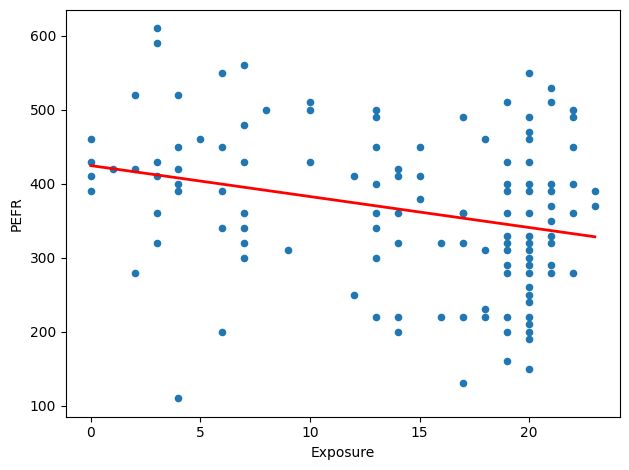

In [5]:
# 회귀직선 시각화

# 앞서 그린 산점도를 다시 그리기
ax = lung.plot.scatter(x='Exposure', y='PEFR')

# 회귀 직선 추가
x_range = np.linspace(lung['Exposure'].min(), lung['Exposure'].max(), 100)  # X의 최소값부터 최대값까지의 범위 생성
x_range_const = sm.add_constant(x_range)  # 생성한 범위에 상수항 추가
y_range = lung_model.predict(x_range_const)  # 회귀 모델을 사용하여 y 값 예측
ax.plot(x_range, y_range, color='red', linewidth=2)  # 회귀 직선을 빨간색으로 그리기

plt.tight_layout()
plt.show()

## 잔차

R-squared 값: 0.07674102286283369


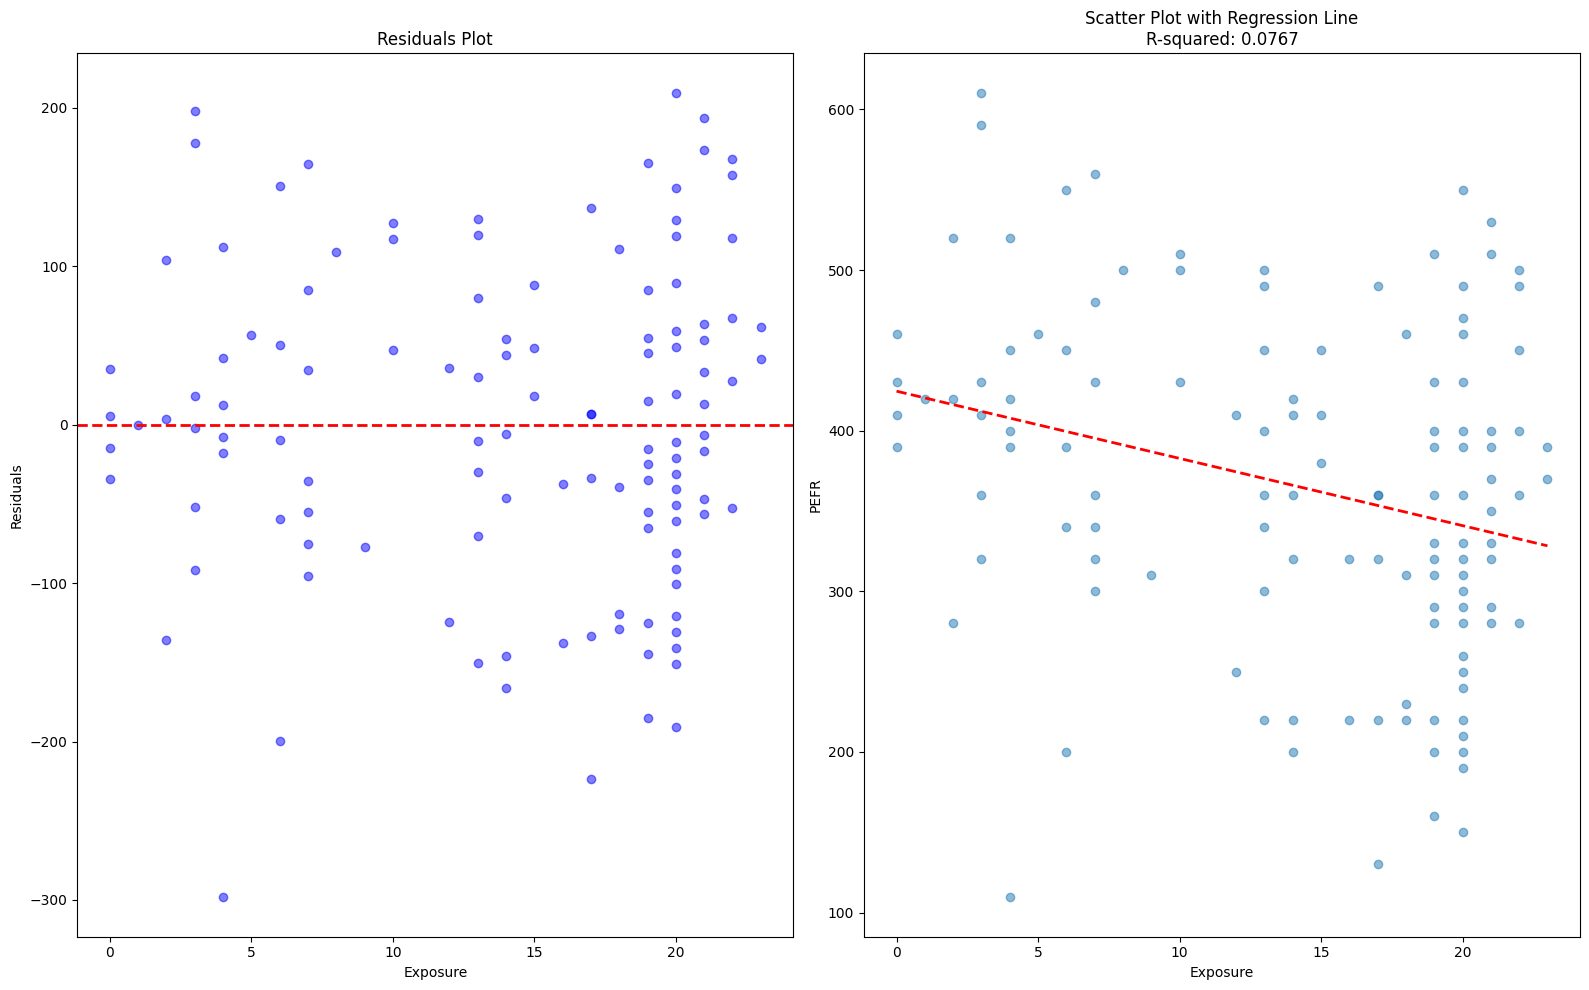

In [6]:
# 잔차 계산
residuals = lung_model.resid

# R-squared 값 계산
r_squared = lung_model.rsquared

# R-squared 값 출력
print("R-squared 값:", r_squared)


# 그래프 그리기
fig, axs = plt.subplots(1,2, figsize=(16,10)) #잔차 plot과 산점도를 동시에 보기

# 첫 번째 플롯: 잔차 플롯
axs[0].scatter(X['Exposure'], residuals, color='blue', alpha=0.5)
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Exposure')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals Plot')

# 두 번째 플롯: 산점도와 회귀 직선
axs[1].scatter(lung['Exposure'], lung['PEFR'], alpha=0.5)
x_range = np.linspace(X['Exposure'].min(), X['Exposure'].max(), 100)
y_range = lung_model.predict(sm.add_constant(x_range))
axs[1].plot(x_range, y_range, color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Exposure')
axs[1].set_ylabel('PEFR')
axs[1].set_title(f'Scatter Plot with Regression Line\nR-squared: {r_squared:.4f}')

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

- $R^2$ 값이 매우 낮다. 모델의 설명력이 그리 좋지 못하다고 말할 수 있다.
- 잔차 Plot을 보면 잔차들이 랜덤하게 분포되어 있는 것 처럼 보인다.

# 2. 다중선형회귀

- 회귀직선 적합, 회귀계수, 표준오차 등등
- 회귀계수의 해석


In [7]:
# 데이터 불러오기
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

house = pd.read_csv(HOUSE_CSV, sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [8]:
# 예측변수와 반응변수 지정
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

# 다중회귀모형 적합
house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

# 다중회귀계수와 절편항 출력
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321066
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


In [9]:
# sm.OLS 이용한 다중회귀 적합
X = house[predictors]
y = house[outcome]

X = sm.add_constant(X)  # 상수항 추가 (절편을 위한 항)

house_model = sm.OLS(y, X).fit()  # 회귀 모델 적합
print(house_model.summary())  # 회귀 결과 요약 출력

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:08:14   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.219e+05   1.57e+04    -33.342

- p값이 낮을수록 예측변수가 유의함을 의미한다.
- SqFtLot은 p=0.323으로, 유의하지 않은 변수이다.
- SqFtLot을 빼고 다시 적합시켜보자.

In [10]:
# SqFtLot 빼고 다시 적합
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade'] #기존의 predictors

predictors.remove('SqFtLot')

X = house[predictors]
X = sm.add_constant(X)  # 상수항 추가 (절편을 위한 항)

house_model = sm.OLS(y, X).fit()  # 회귀 모델 적합
print(house_model.summary())  # 회귀 결과 요약 출력

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6672.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:08:14   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22682   BIC:                         6.304e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.224e+05   1.56e+04    -33.391

- 모두 유의한 변수만 남았다.
- $R^2$ = 0.541로, 위 4개의 변수들이 집값의 54.1%를 설명함을 의미한다.
- SqFtTotLiving (집 면적) 이 1단위 증가하면, AdjSalePrice(주택 가격)이 228불 증가한다.


# 3. 분산분석과 회귀모형

분산분석(ANOVA)
- 여러 집단 간의 평균을 비교할 때 사용하는 통계적 기법
- 앞선 킹 카운티 주택가격 데이터를 이용해 분산분석을 진행해 보고자 한다.
- 이 데이터에는 다음과 같이 주거 형태에 관한 요인변수가 주어져있다.

In [11]:
print(house.PropertyType.value_counts())

PropertyType
Single Family    20720
Townhouse         1710
Multiplex          257
Name: count, dtype: int64


## 분산분석 (ANOVA)

- scipy 라이브러리의 f_oneway 함수를 사용한다.

In [12]:
# ANOVA 수행

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(
    house[house['PropertyType'] == 'Multiplex']['AdjSalePrice'],
    house[house['PropertyType'] == 'Single Family']['AdjSalePrice'],
    house[house['PropertyType'] == 'Townhouse']['AdjSalePrice']
) #여러 집단의 평균을 비교

print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("주택 유형에 따른 가격 차이가 유의미합니다.")
else:
    print("주택 유형에 따른 가격 차이가 유의미하지 않습니다.")

F-statistic: 92.09
P-value: 0.0000
주택 유형에 따른 가격 차이가 유의미합니다.


여러 집단 간의 평균을 비교하고 싶은 경우, 위와 같이 분산분석을 이용해 간단히 결과를 출력할 수 있다. \
또는, 앞서 배운 다중회귀를 이용해 여러 집단을 비교할 수도 있다. 이 방법에 대하여 알아보자.



## 회귀모형 (가변수 사용)

In [13]:
#get_dummies를 이용해 가변수를 만든다. 총 3개의 범주를 확인할 수 있다. (K=3)
print(pd.get_dummies(house['PropertyType'], dtype=int).head())

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0


In [14]:
# drop_first=True를 이용해 가변수의 개수가 K-1이 되도록 만든다.
# K가 아니라 K-1인 이유는?
# 나머지 두 가변수의 값을 안다면, house PropertyType을 바로 알 수 있기 때문이다.
## (1,0) : Single Family
## (0,1) : Townhouse
## (0,0) : Multiplex

print(pd.get_dummies(house['PropertyType'], drop_first=True, dtype=int).head())

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0


In [15]:
# LinearRegression 이용한 다중회귀 적합

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']
              # 이 중 PropertyType이 범주형 변수이고,
              # 이 Type에 따른 주택 가격 차이가 얼마나 나는지 알고싶다.

X = pd.get_dummies(house[predictors], drop_first=True, dtype=int) #가변수를 이용한다.
y = house['AdjSalePrice']

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, y)

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503828
 SqFtLot: -0.07036798136813083
 Bathrooms: -15979.013473415205
 Bedrooms: -50889.73218483025
 BldgGrade: 109416.30516146179
 PropertyType_Single Family: -84678.21629549257
 PropertyType_Townhouse: -115121.97921609184


해석은 다음과 같다.
- PropertyType_Single Family = 0, PropertyType_Townhouse = 0일 때, Multiplex는 암묵적으로 정의된다.
- Single Family인 주택은 Multiplex보다 약 85,000불정도 주택가치가 낮다.
- Townhouse인 주택은 Multiplex보다 약 150,000불 정도 주택가치가 낮다.

\

- 추가적으로, **모든 회귀계수 = 0인지**에 대한 F-검정통계량의 분포는 이전처럼 sm.OLS를 이용해 쉽게 구할 수 있다.

In [16]:
# sm.OLS 이용한 다중회귀 적합

X = sm.add_constant(X) # 상수항 추가 (절편을 위한 항)

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3826.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:08:15   Log-Likelihood:            -3.1515e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22679   BIC:                         6.304e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

p가 거의 0에 가까우므로, 모든 계수가 0은 아니다. 즉, **모든 계수가 0이다** 라는 귀무가설을 기각한다. (앞선 분산분석의 결과와 같다.)

## 교호작용

- 킹 카운티 주택가격 데이터를 다시 살펴보자.
- 부동산의 경우 위치가 매우 중요하다. 즉, **주택 크기와 매매 가격 사이 관계가 위치에 달려있다**고 가정해볼 수 있다.
- 임대료가 싼 지역 + 큰 집 = 임대료가 비싼 지역 + 큰 집
- 위 둘의 가치는 같지 않다.
- 따라서, SqFtTotLiving (집 면적)와 ZipCode(우편번호) 간의 교호작용을 고려하여 모델을 적합시켜야한다.

- 먼저, 집의 위치를 나타내는 ZipCode 변수에 대해 살펴보자.

In [17]:
house.ZipCode.value_counts() #총 80개의 우편번호가 있다.

ZipCode
98038    788
98103    671
98042    641
98115    620
98117    619
        ... 
98288      4
98224      3
98068      1
98113      1
98043      1
Name: count, Length: 80, dtype: int64

- 80개의 우편번호 하나하나에 대해 가변수를 만들거나 그룹화하는것은 너무 복잡하다.
- 우편번호 당 집이 1개인 곳들도 있다.
- 따라서, 우편번호들 중 집값이 비슷한 구간들을 하나로 묶어 그룹화하고자 한다.

In [18]:
# 집값을 예측하는 다중회귀모델 적합

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [19]:
# 우편번호가 같은 집들끼리 잔차를 계산해 그 중간값을 median_residual로 반환한다.
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual') #잔차가 작은 것부터 큰 순으로 나열한다.

zip_groups

,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593
...,...,...,...
60,98119,260,174462.549290
54,98112,357,232788.487256
25,98040,244,254004.002463
3,98004,293,383596.028729


In [20]:
#해당 ZipCode보다 더 '잔차가 작은' ZipCode를 갖는 집들의 개수를 반환한다.
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])


 #이를 총 5개의 구간으로 쪼갠다.
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)

zip_groups.head()

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0


In [21]:
print(zip_groups.ZipGroup.value_counts().sort_index())

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

ZipGroup
0    16
1    16
2    16
3    16
4    16
Name: count, dtype: int64


- 이제 교호작용을 고려한 모델을 적합시킬 수 있다.

#### 만약 위 과정이 없다면?
* 80개의 우편번호 각각에 대한 교호작용을 고려하게 된다.
* 따라서 모델이 매우 복잡해진다.
* 또한, 우편번호는 숫자로 되어있긴 하지만 사실상 **명목형 변수**이다.
* 우편번호의 크고 작음이 위치의 가깝고 멈을 의미하지 않기 때문이다.
* 따라서 모델의 해석도 어렵다.

In [22]:
# SqFtTotLiving*ZipCode 항을 넣으면 교호작용을 고려한 모델을 출력한다.
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + '
                + 'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:08:16   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

- 주택 크기와 위치 사이에는 강한 상호작용이 있다.
- 가격대가 가장 낮은ZipGroup에서 주택 크기에 대한 기울기는, SqFtTotLiving의 계수인 114.76이다.
- 그 다음으로 가격대가 낮은 ZipGroup에서 주택 크기에 대한 기울기는 114.76+32.60 = 147.36이다.
- 가장 가격대가 높은 ZipGroup에서 주택 크기에 대한 기울기는 114.76+226.68 = 341.44이다.

